In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Missing values percentage
(df.isnull().sum())/ 891 * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* The cabin column contains more than 50% missing values of the whole dataframe. So it is advisable to drop the column.
* Age column which is a numerical column, contains 20% missing values of the whole dataframe. We can fill the missing values with Mean
* Embarked column which is a categorical column, contains 0.2% missing values of the whole dataframe. We can fill the missing values with Mode

In [7]:
# Copy of the original dataframe
copy = df

In [8]:
# Dropping the cabin column
#df = df.drop("Cabin", axis= 1)
df.drop("Cabin", axis= 1, inplace = True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# Filling the Age missing values with the mean
age_mean =  df['Age'].mean()
age_mean

29.69911764705882

In [11]:
# df.method({col: value}, inplace=True)' or df[col] = df[col].method(value)
df["Age"].fillna(30, inplace = True)

C:\Users\uniqu\AppData\Local\Temp\ipykernel_4424\1790569304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(30, inplace = True)


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [14]:
# Filling embarked missing value with its mode
df.fillna({"Embarked": "S"}, inplace = True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
#!pip install seaborn

In [17]:
# !pip install scikit-learn

#### Check for outliers
Outliers are values out of range. This can only be applied on numerical columns

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
# df.info()

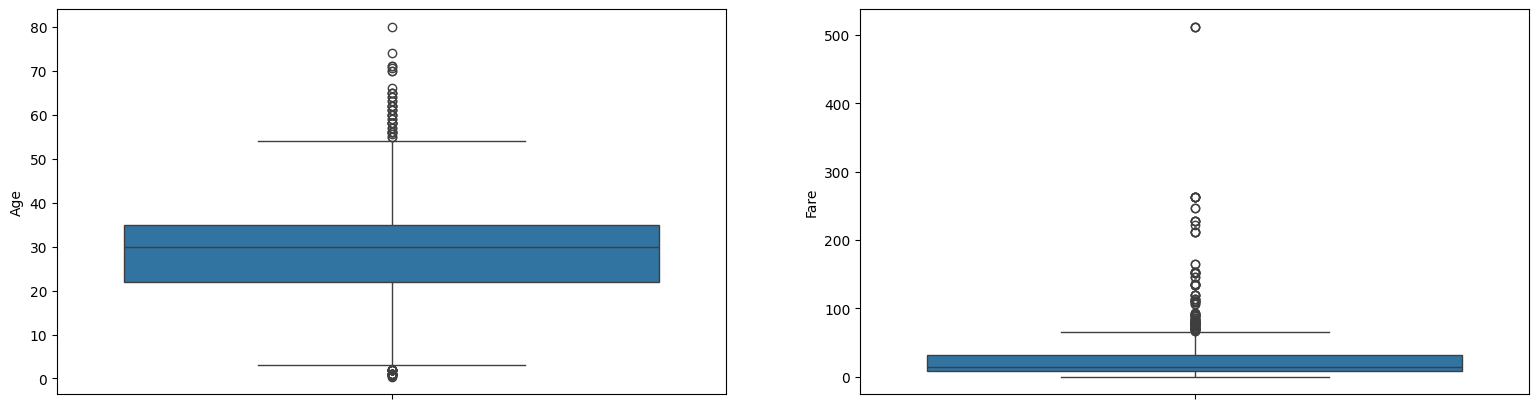

In [20]:
plt.figure(figsize = (19, 5))
plt.subplot(121)
sns.boxplot(df["Age"])
plt.subplot(122)
sns.boxplot(df["Fare"])
plt.show()

In [21]:
### Fixing outliers by using the numpy log function
np.log(df['Age'])

0      3.091042
1      3.637586
2      3.258097
3      3.555348
4      3.555348
         ...   
886    3.295837
887    2.944439
888    3.401197
889    3.258097
890    3.465736
Name: Age, Length: 891, dtype: float64

C:\Users\uniqu\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


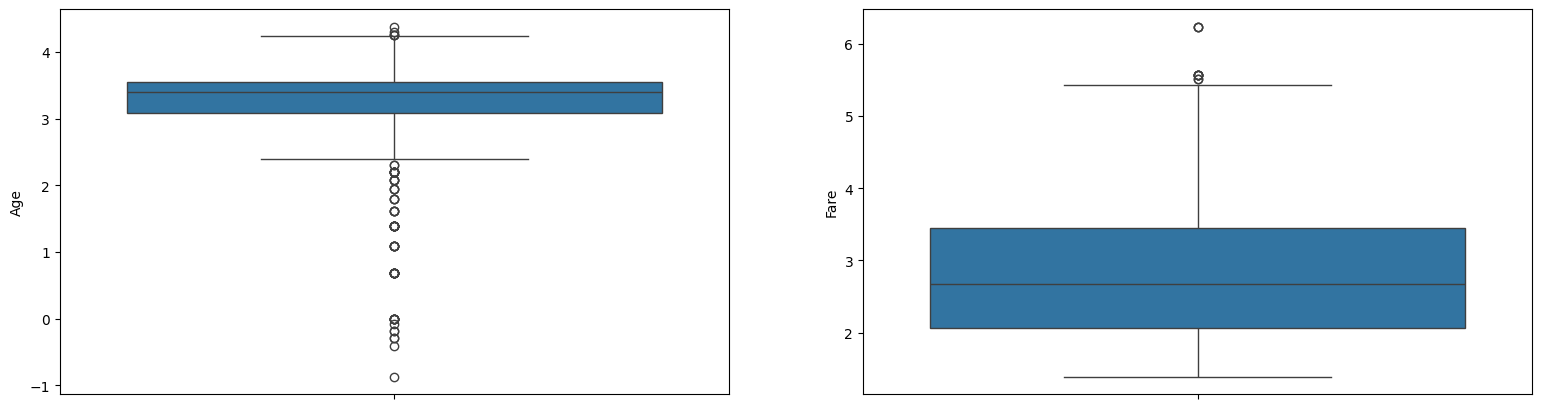

In [22]:
plt.figure(figsize = (19, 5))
plt.subplot(121)
sns.boxplot(np.log(df["Age"]))
plt.subplot(122)
sns.boxplot(np.log(df["Fare"]))
plt.show()

In [23]:
df[df['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Onehot Encoding
One hot encoding for both SEX and Embarked column

In [25]:
oneHotEmbarked = pd.get_dummies(df["Embarked"]).astype(int)

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [27]:
df = pd.concat([df, oneHotEmbarked], axis= 1)

In [28]:
# Drop the embarked column
df.drop("Embarked", axis = 1, inplace =  True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1


In [30]:
oneHotEncodeSex = pd.get_dummies(df["Sex"]).astype(int)
oneHotEncodeSex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [31]:
df = pd.concat([df, oneHotEncodeSex], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1,0,1


In [32]:
df.drop("Sex", axis = 1, inplace = True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1


In [34]:
df.drop(["Name", "Ticket"], axis = 1, inplace = True)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [36]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.131900,0.131900
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632,0.032330,-0.010738,-0.021566,-0.084660,0.084660
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.182333,-0.182333
C,-0.001205,0.168240,-0.243292,0.032330,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.082853,-0.082853
Q,-0.033606,0.003650,0.221009,-0.010738,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.074115,-0.074115
S,0.022204,-0.149683,0.074053,-0.021566,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.119224,0.119224


#### Label Encoding

In [37]:
dataframe = pd.DataFrame({"Name": ["John", "Ayo", "George"], "Height" : ["Tall", "Short", "Short"], "State": ["Abuja", "PH", "Ondo"]})
dataframe

,Name,Height,State
0,John,Tall,Abuja
1,Ayo,Short,PH
2,George,Short,Ondo


In [38]:
# Label encoding
dataframe["Height encoded"] = dataframe["Height"].map({"Tall" : 2, "Short": 1})

In [39]:
dataframe

,Name,Height,State,Height encoded
0,John,Tall,Abuja,2
1,Ayo,Short,PH,1
2,George,Short,Ondo,1


In [40]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [41]:
df.shape

(891, 12)

In [42]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

### One hot encoding Sibsp and Parch

In [43]:
df["SibSp"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [44]:
oneHotSibsp = pd.get_dummies(df["SibSp"]).astype(int)

In [45]:
df = pd.concat([df, oneHotSibsp], axis = 1)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,0,1,2,3,4,5,8
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,1,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0


In [47]:
# Dropping the sibsp column
df.drop("SibSp", axis = 1, inplace = True)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare,C,Q,S,female,male,0,1,2,3,4,5,8
0,1,0,3,22.0,0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0
1,2,1,1,38.0,0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0
2,3,1,3,26.0,0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0
3,4,1,1,35.0,0,53.1000,0,0,1,1,0,0,1,0,0,0,0,0
4,5,0,3,35.0,0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0


In [49]:
oneHotParch = pd.get_dummies(df["Parch"]).astype(int)

In [50]:
df = pd.concat([df, oneHotParch], axis = 1)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare,C,Q,S,female,...,4,5,8,0,1,2,3,4,5,6
0,1,0,3,22.0,0,7.2500,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,1,38.0,0,71.2833,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,7.9250,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,35.0,0,53.1000,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,8.0500,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
# Dropping the Parch column
df.drop("Parch", axis = 1, inplace = True)

In [53]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,C,Q,S,female,male,...,4,5,8,0,1,2,3,4,5,6
0,1,0,3,22.0,7.2500,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,1,1,38.0,71.2833,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,7.9250,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,35.0,53.1000,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,35.0,8.0500,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [54]:
df.shape

(891, 24)

### Predictive Modelling

In [55]:
x = df.drop("Survived", axis = 1)
y = df["Survived"]

In [56]:
# print("The shape of X  is", x.shape)
print(f"The shape of X  is {x.shape}")
print(f"The shape of Y  is {y.shape}")

The shape of X  is (891, 23)
The shape of Y  is (891,)


In [57]:
x.head()

,PassengerId,Pclass,Age,Fare,C,Q,S,female,male,0,...,4,5,8,0,1,2,3,4,5,6
0,1,3,22.0,7.2500,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,38.0,71.2833,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,26.0,7.9250,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,4,1,35.0,53.1000,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,3,35.0,8.0500,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
# Converting input variables or column names to string/text
x.columns = x.columns.astype(str)
x_columns = x.columns

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
# x= pd.DataFrame(x, columns = x_columns)

In [61]:
# x.head()

In [62]:
# Rule 3
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y  = train_test_split(x, y, random_state= 50)

In [63]:
train_x.shape

(668, 23)

In [64]:
test_x.shape

(223, 23)

### KNearestNeighbor 

In [65]:
# Rule 4
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [66]:
# Intitate your knn model
knn = KNN(n_neighbors = 9)

# Train or fit the model
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=9)

In [67]:
# Rule 5
# Testing our trained model on test set and check for the accuracy
predicted_output = knn.predict(test_x)
accuracy = f1_score(predicted_output, test_y)
accuracy

0.7468354430379747

In [68]:
accuracy_list = []
for i in range(1,100):
    clf = KNN(n_neighbors = i)
    clf.fit(train_x, train_y)
    predicted_output = clf.predict(test_x)
    accuracy = f1_score(predicted_output, test_y)
    accuracy_list.append({i: accuracy})

In [69]:
accuracy_list = []
k_values = []
for i in range(1,100):
    clf = KNN(n_neighbors = i)
    clf.fit(train_x, train_y)
    predicted_output = clf.predict(test_x)
    accuracy = f1_score(predicted_output, test_y)
    k_values.append(i)
    accuracy_list.append(accuracy)

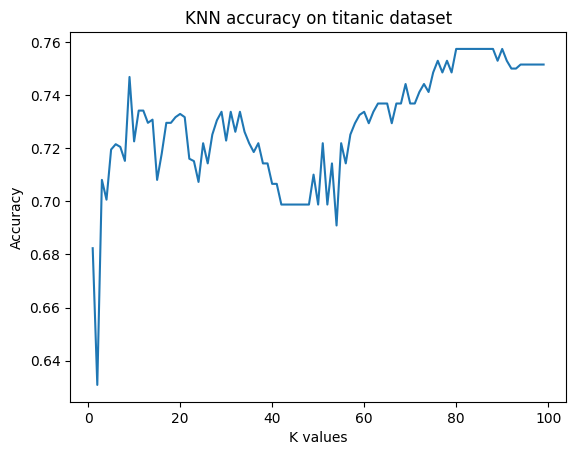

In [70]:
plt.plot(k_values, accuracy_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("KNN accuracy on titanic dataset")
plt.show()

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression as LR

In [72]:
# Initialize the model
clf = LR(C = 20)
clf.fit(train_x, train_y)

LogisticRegression(C=20)

In [73]:
predicted_values = clf.predict(test_x)

In [74]:
f1_score(predicted_values, test_y)

0.7674418604651163

In [75]:
accuracy_list = []
for i in range(1, 201):
    clf = LR(C = i)
    clf.fit(train_x, train_y)
    predicted_values = clf.predict(test_x)
    accuracy = f1_score(predicted_values, test_y)
    myDict = {i: accuracy}
    accuracy_list.append(myDict)

In [76]:
# accuracy_list

### Decision Tree Model

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
#Initialize the model
DT = DecisionTreeClassifier(random_state = 20)
DT.fit(train_x, train_y)

DecisionTreeClassifier(random_state=20)

In [79]:
predicted_values = DT.predict(test_x)

In [80]:
f1_score(predicted_values, test_y)

0.6976744186046512

In [81]:
test_y

558    1
547    1
494    0
679    1
7      0
      ..
453    1
213    0
690    1
253    0
237    1
Name: Survived, Length: 223, dtype: int64

### Change the maximum depth property of the Decision tree model

In [82]:
DT = DecisionTreeClassifier(max_depth=1, random_state= 20)
DT.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=1, random_state=20)

In [83]:
predicted_values = DT.predict(test_x)

In [84]:
f1_score(predicted_values, test_y)

0.735632183908046

In [85]:
# accuracyList = []
# maxDepth = []

# for i in range(1, 101):
#     DT = DecisionTreeClassifier(max_depth=i, random_state= 20)
#     DT.fit(train_x, train_y)
#     predicted_values = DT.predict(test_x)
#     accuracy = f1_score(predicted_values, test_y)
#     myDict = {i: accuracy}
#     accuracyList.append(myDict)
#     # accuracyList.append(accuracy)
#     maxDepth.append(i)

In [86]:
# accuracyList

### Overfitting and Underfitting

In [87]:
#Logistic regression model
clf.score(train_x, train_y)

0.8053892215568862

In [88]:
clf.score(test_x, test_y)

0.820627802690583

In [89]:
# knn
knn.score(train_x, train_y)

0.8263473053892215

In [90]:
knn.score(test_x, test_y)

0.820627802690583

In [91]:
#Decision tree
DT.score(train_x, train_y)

0.7844311377245509

In [92]:
DT.score(test_x, test_y)

0.7937219730941704

In [93]:
training_accuracy = []
test_accuracy = []
maxDepth = []

for i in range(1, 10):
    DT = DecisionTreeClassifier(max_depth=i, random_state= 20)
    DT.fit(train_x, train_y)
    train_score = DT.score(train_x, train_y)
    test_score = DT.score(test_x, test_y)
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)
    

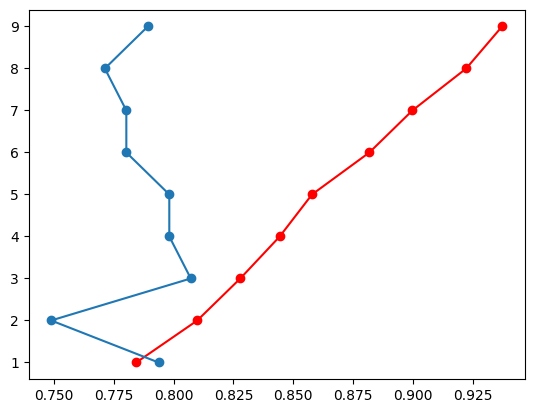

In [94]:
# plt.plot(range(1, 10))range(1, 10)
plt.plot(training_accuracy, range(1, 10), c="red", marker= "o")
plt.plot(test_accuracy, range(1, 10), marker= "o")

### Feature Selection
Feature selection is the process of isolating the most consistent, non-redundant, and relevant features to use in model construction. Methodically reducing the size of datasets is important as the size and variety of datasets continue to grow.

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Initialize our model
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
# predicted_values = rf.predict(test_x)

RandomForestClassifier()

In [97]:
# f1_score(predicted_values, test_y)

In [98]:
# Feature selection
# pd.DataFrame({"Columns": x.columns, "Important features": rf.feature_importances_}).sort_values(by="Important features", ascending= False).head()
pd.DataFrame({"Columns": df.drop("Survived", axis= 1).columns, "Important features": rf.feature_importances_}).sort_values(by="Important features", ascending= False).head()

,Columns,Important features
0,PassengerId,0.187063
3,Fare,0.183105
2,Age,0.166381
8,male,0.131253
7,female,0.127239


In [99]:
test_x

array([[0.62696629, 0.        , 0.48479517, ..., 0.        , 0.        ,
        0.        ],
       [0.61460674, 0.5       , 0.37170143, ..., 0.        , 0.        ,
        0.        ],
       [0.55505618, 1.        , 0.25860769, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.7752809 , 0.        , 0.3842674 , ..., 0.        , 0.        ,
        0.        ],
       [0.28426966, 1.        , 0.37170143, ..., 0.        , 0.        ,
        0.        ],
       [0.26629213, 0.5       , 0.09525006, ..., 0.        , 0.        ,
        0.        ]])